# Multiple Linear Regression - Bike_sharing_assignment

## Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. 

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. 
Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.

The company wants to know:
    
•	Which variables are significant in predicting the demand for shared bikes.

•	How well those variables describe the bike demands

 
- Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


# Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the Bike sharing dataset.

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
bs=pd.read_csv('day.csv')
bs.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bs.shape

(730, 16)

In [5]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bs.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bs.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# step 2: Data quality check

In [8]:
# dtypes-  valuecounts
bs.dtypes.value_counts()
# most cols are int and float  values

int64      11
float64     4
object      1
dtype: int64

#### numerical variables:
'instant', 'temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt'

#### categorical variables:
'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit'

In [8]:
# check the missing values percetange in descending order of each column of bs
(bs.isnull().mean() * 100).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64



#### Findings: 

- The given dataset has 730 rowns and 16 columns.
- No null/missing values found in the dataset.
- Except 'dteday' whose dtype is object (contains date type info), all other are either float or integer type.
- Some columns that are categorical in nature, but in integer/float type.


## Dropping  redundant & unwanted columns

The following variables can be dropped:

- instant : Its only an index value.no specific use.

- dteday : It is the date column, Since we already have seperate columns for 'year' & 'month' we dont need this column.

- casual & registered : Both these columns contains the count of bike booked by different categories of customers.
Since our objective is to find the "total count of bikes "and not by specific category, we will ignore these two columns.


In [ ]:
# categorical variables:
# 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit'

#numerical variables:
# 'instant','temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt'


In [9]:
#  create List of variables to drop
cols_to_drop =  ['instant','dteday','casual', 'registered']


# Drop the specified columns 
bs = bs.drop(columns=cols_to_drop)

#check the columns number:
print(bs.shape)

(730, 12)


# Step 3: Visualising the Data

Identify if some predictors directly have a strong association with the outcome variable



In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

### ***Univariate Analysis***

### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [113]:
# Pairplot of numerical variables and num_var is the list of numerical variables

num_var = ['temp', 'atemp', 'hum', 'windspeed','cnt']
num_var

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

## Univariate Analysis on continous/numerical columns:
    

#### 1. histogram

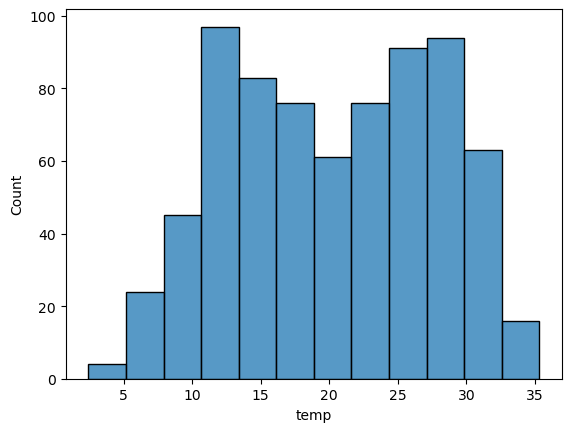

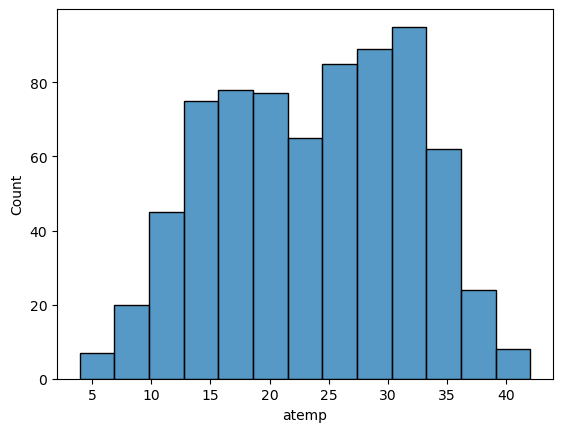

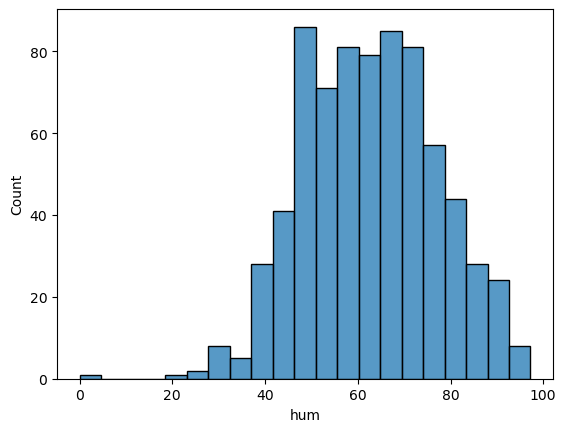

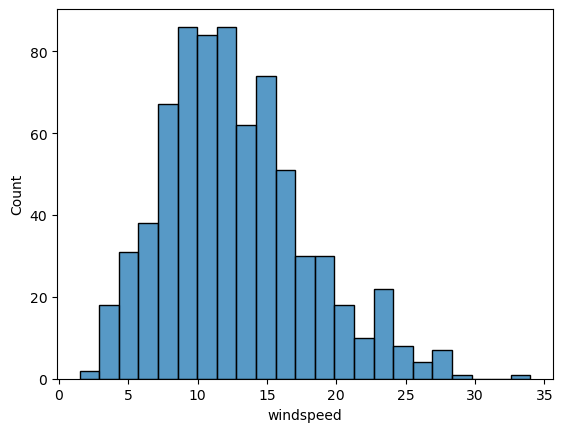

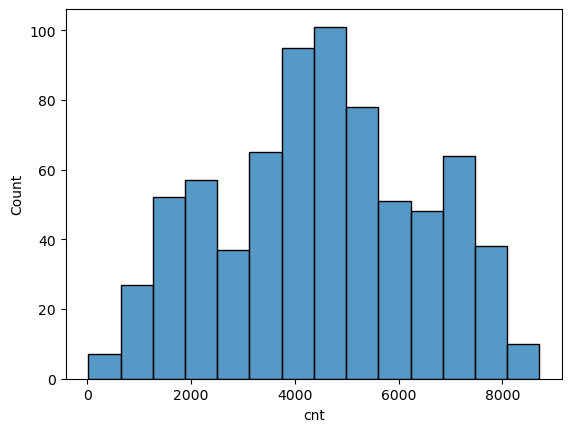

In [12]:
#Checking all numerical Variables and their count values in histogram -  to see the distribution:
for i in num_var:
    sns.histplot(bs[i])
    plt.show()

#### 2. boxplot

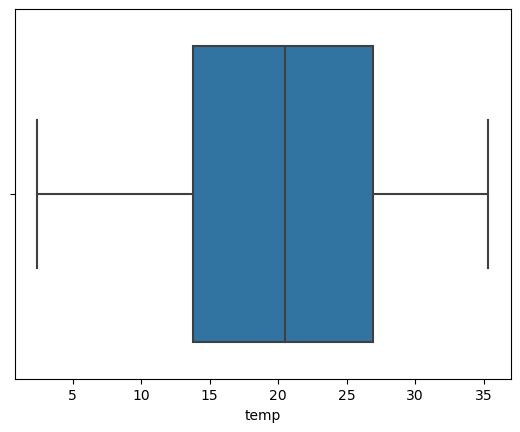

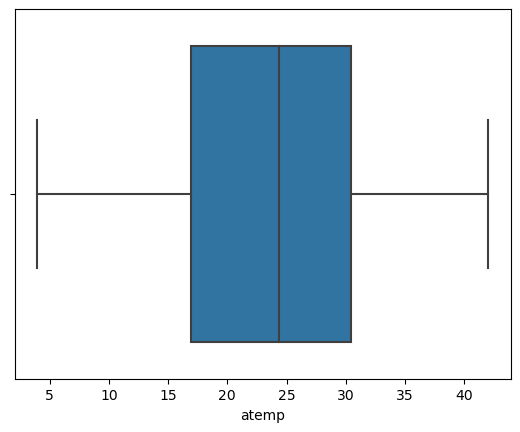

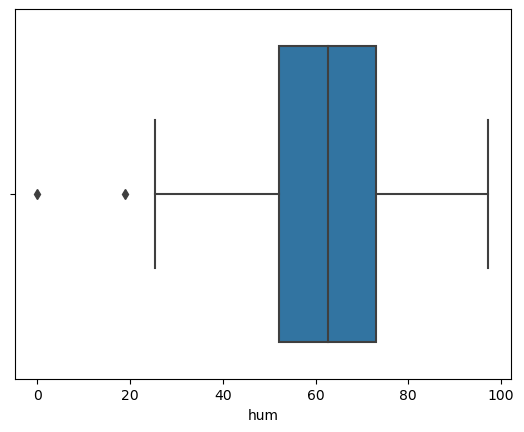

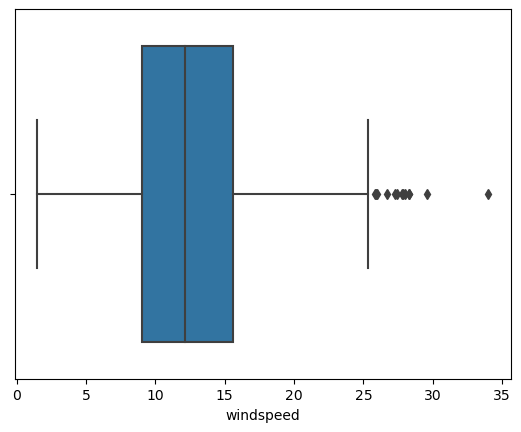

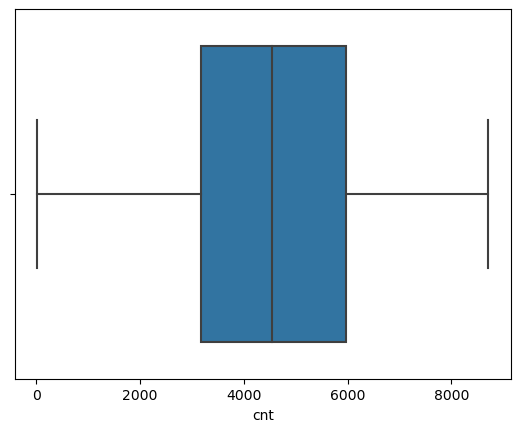

In [13]:
# Boxplot of all numerical variables:

for i in num_var:
    sns.boxplot(bs[i])
    plt.show()
    

### Inference:
- Some outliers seen  in "HUM"  and "windspeed"

#### 3. scatterplot

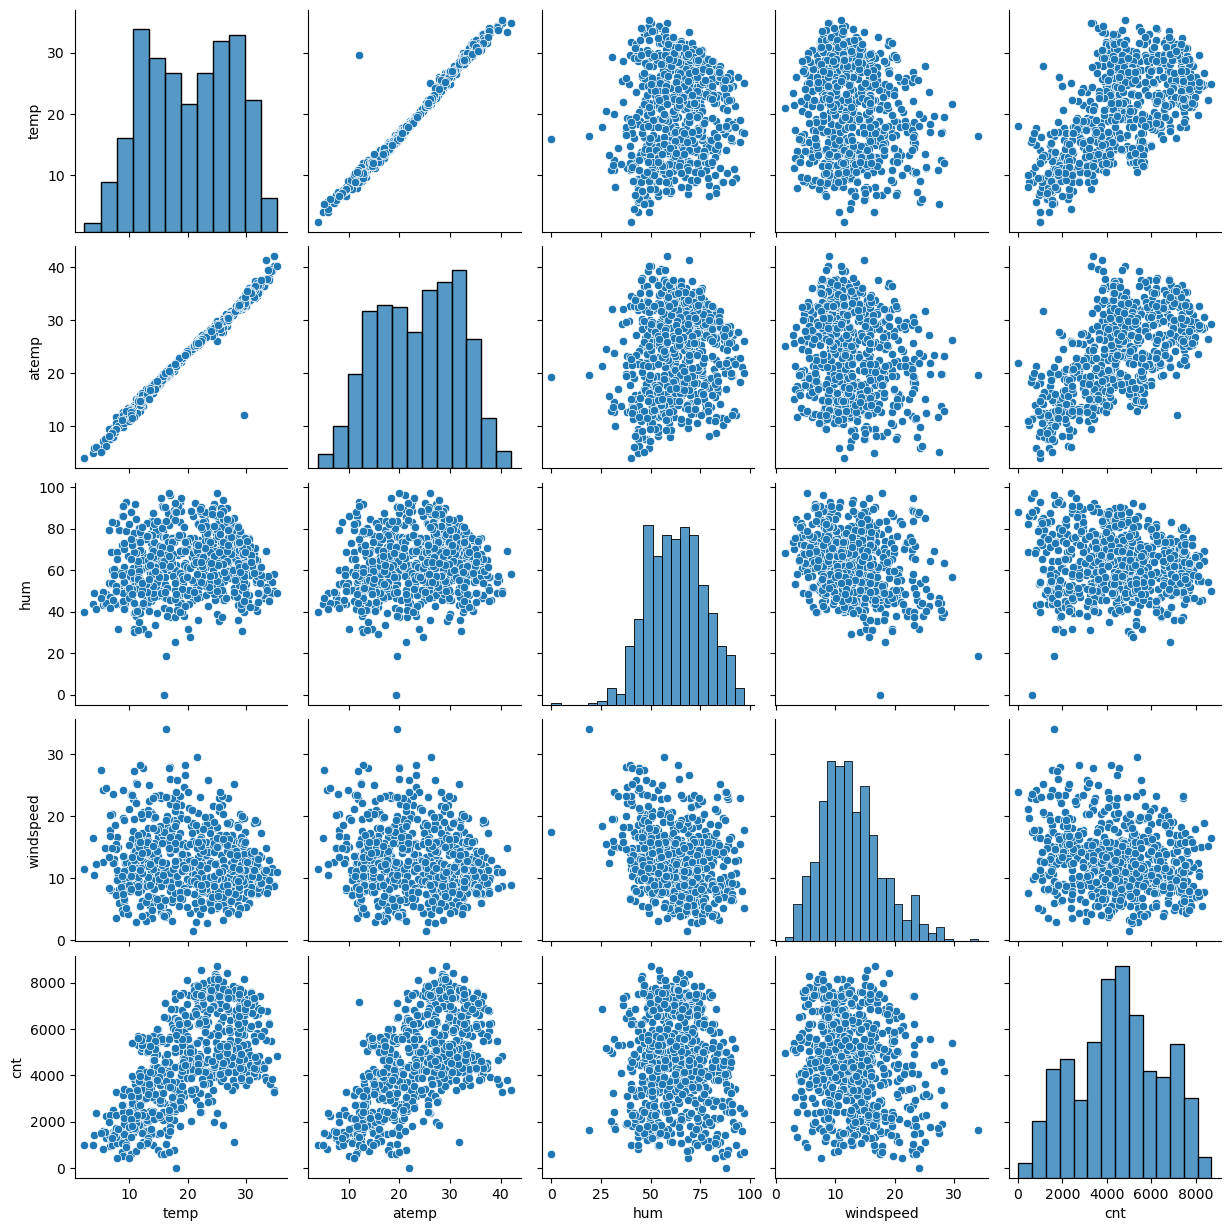

In [14]:
#Visualising Numeric Variables- scatterplot
# this graph serves as bivariate analysis  as "cnt" target column is there:

sns.pairplot(bs[num_var])
plt.show()

#### Inference:
- There is a strong  linear relationship between temp and atemp.
- Positive linear realtionship seen  between 'temp-cnt' and 'atemp-cnt'

### Visualising Categorical Variables

Let's make a boxplot for some of these variables.

In [15]:
# cate_var is the list of categorical variables:
cate_var = ['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit']
cate_var

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

#### 1. barplot

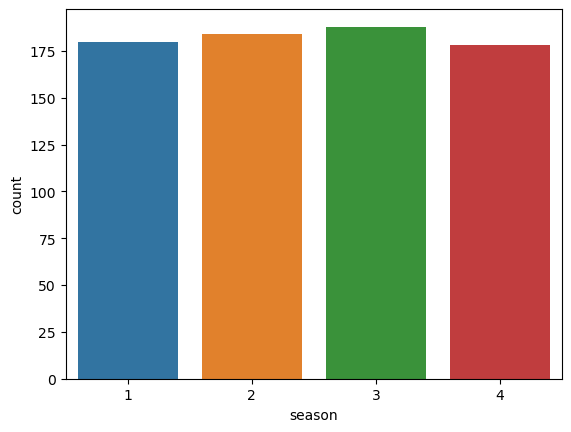

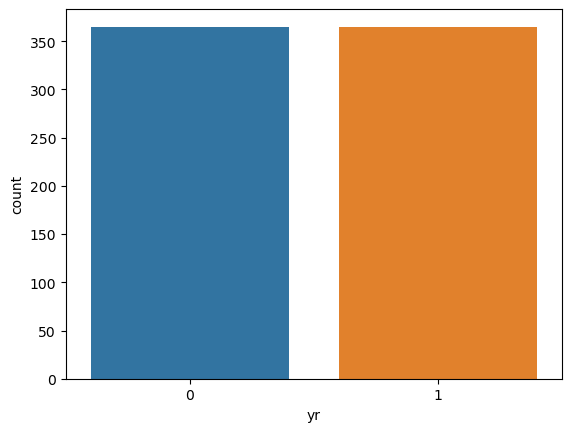

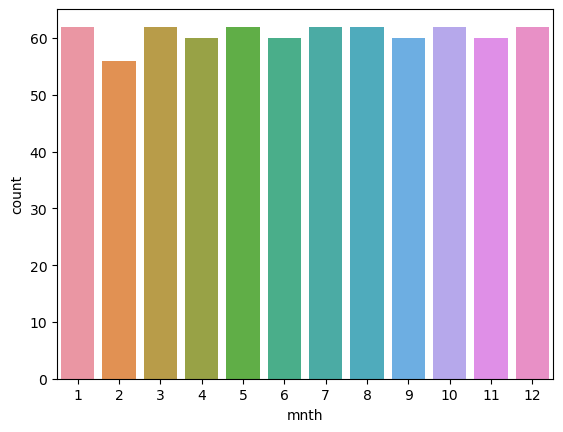

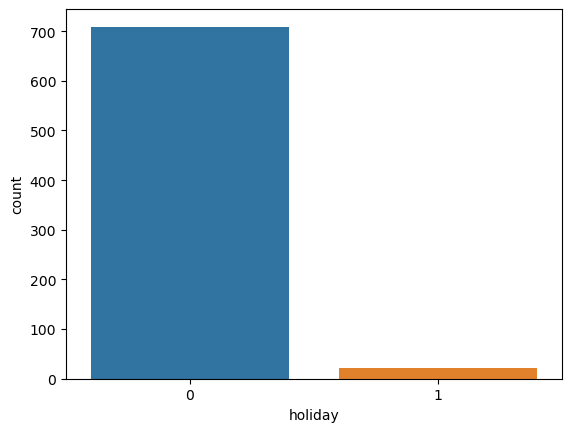

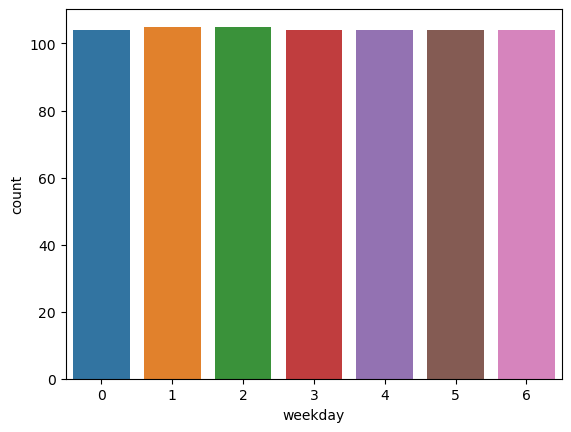

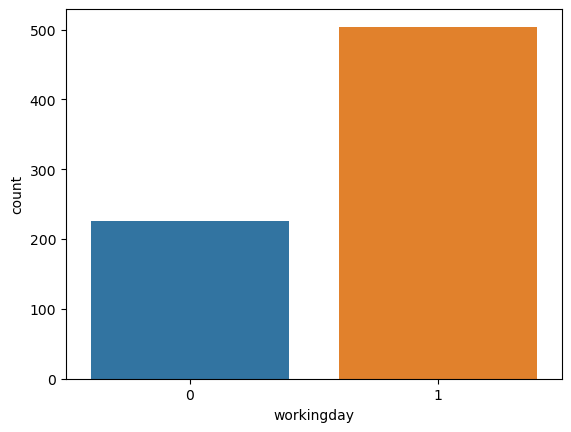

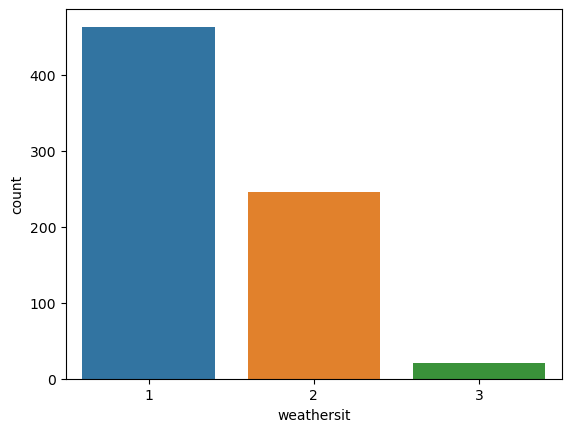

In [16]:
#Checking all Categorical Variables and their values in bar chart:
for i in cate_var:
    sns.countplot(bs[i])
    plt.show()

### Bivariate Analysis:

#### done  against the target column

### Bivariate Analysis: for numericalvariables:-

#### 1.  scatterplot

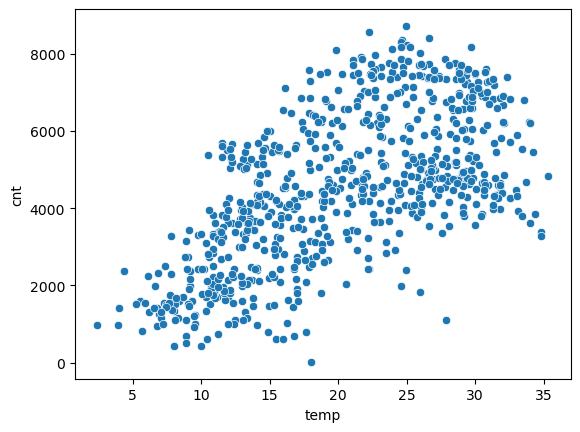

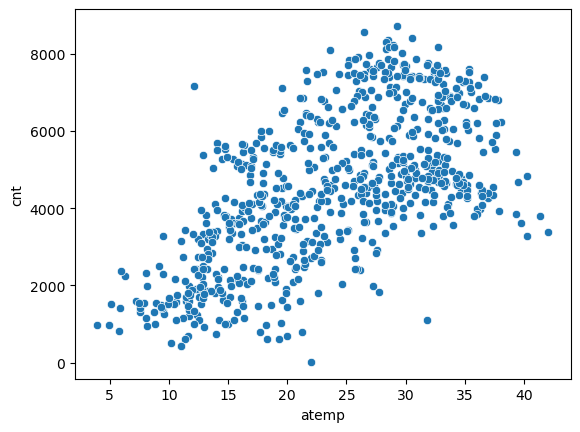

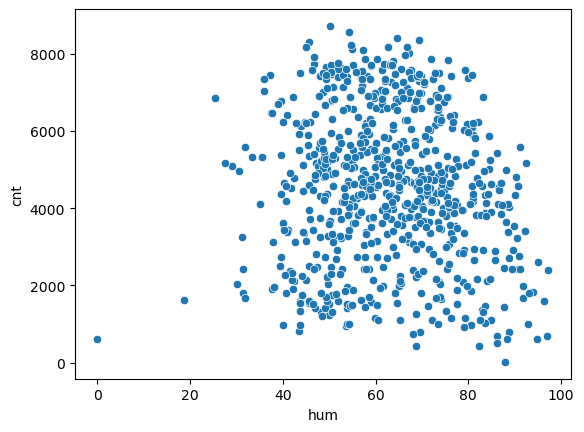

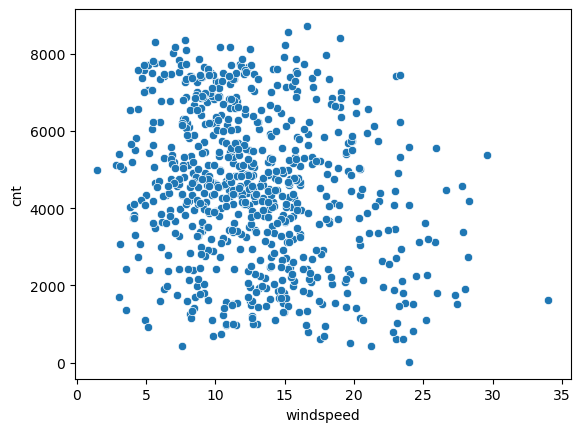

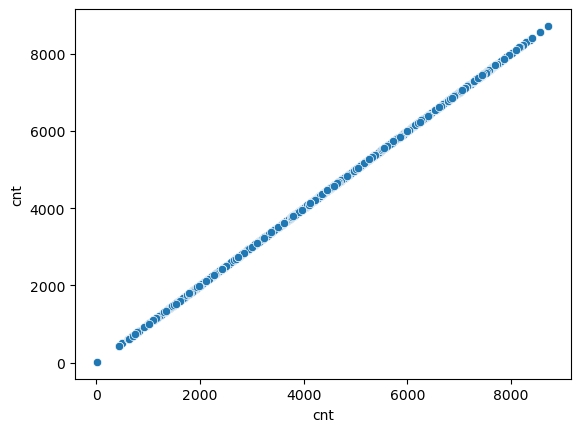

In [17]:
#Checking all numerical Variables and their relationship with target "cnt" in scatterplot:
for i in num_var:
    sns.scatterplot(x=bs[i], y=bs["cnt"])
    plt.show()
    

### Bivariate Analysis: for categorical variables:-

#### 2. barchart

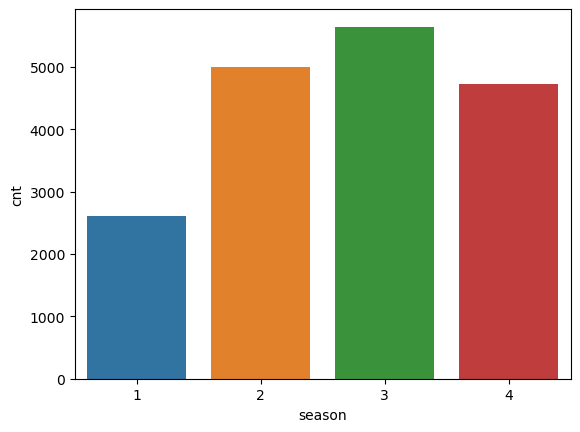

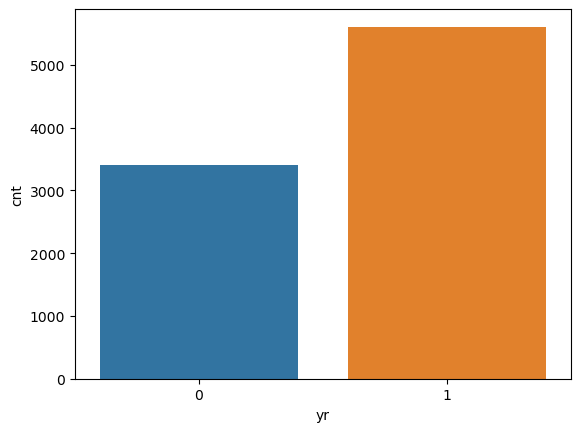

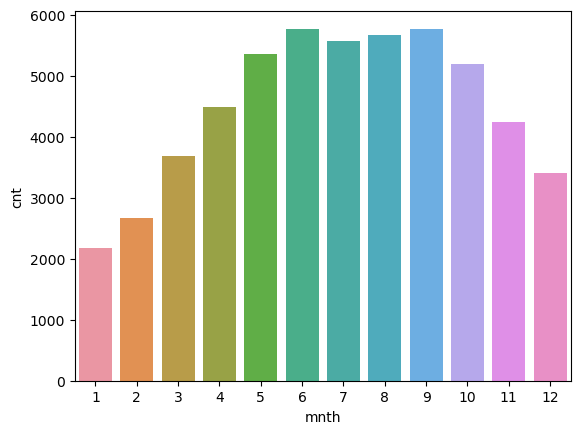

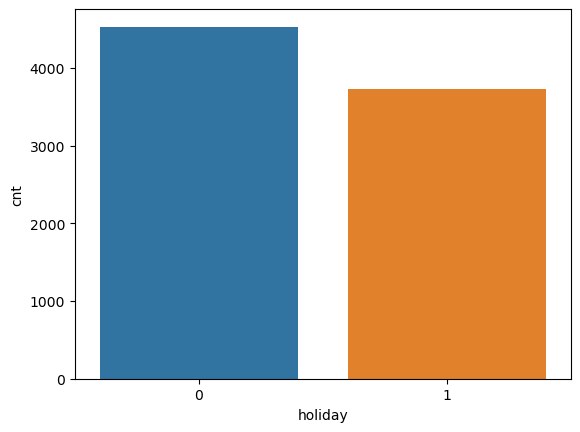

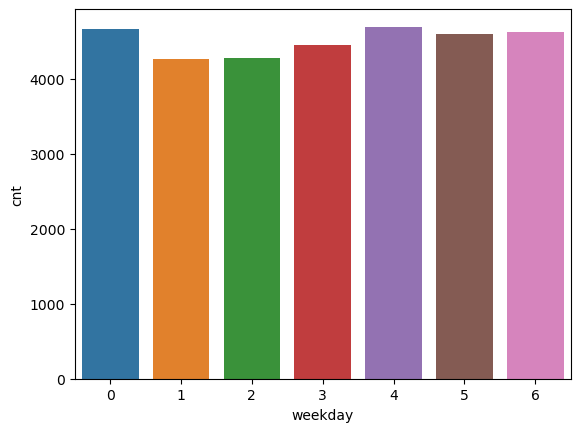

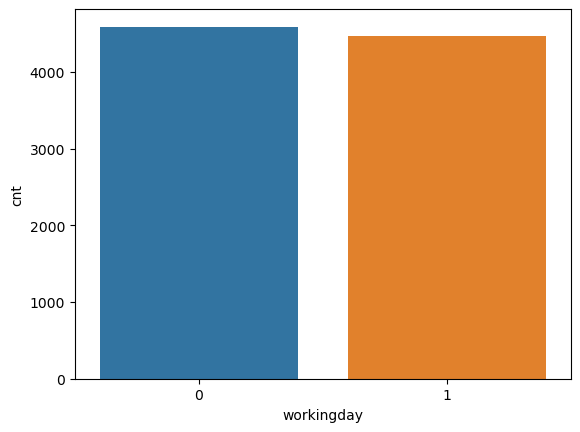

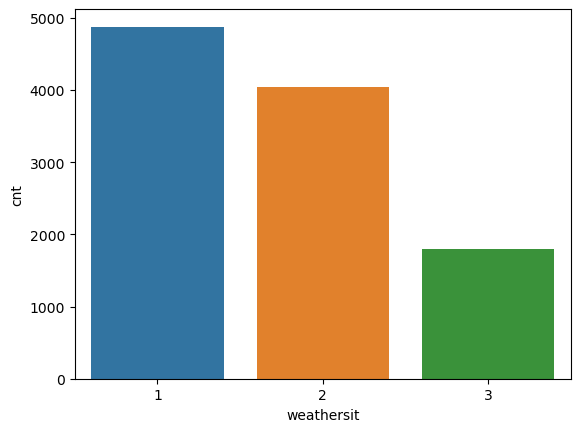

In [18]:
#Checking all categorical Variables and their relationship with target "cnt" in barchart:
for i in cate_var:
    sns.barplot(x=bs[i], y=bs["cnt"], ci= None)
    plt.show()

#### 3. Boxplot of categorical variables

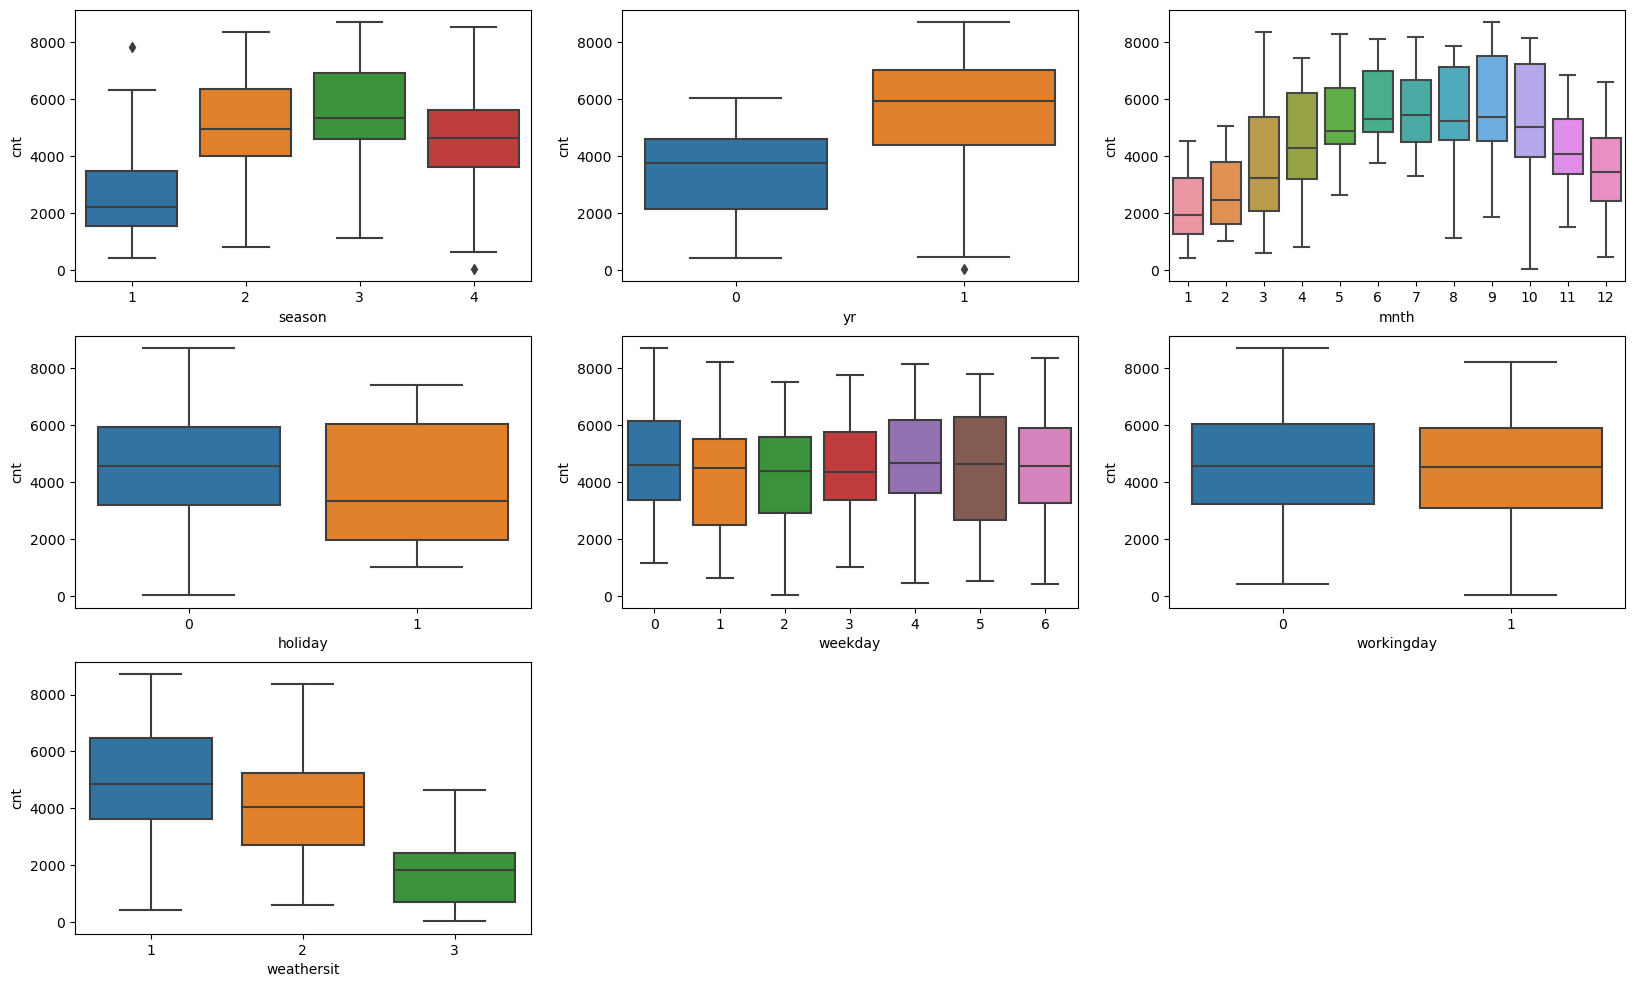

In [19]:
# Boxplot of categorical variables  with target "cnt" variable:
# for multiple boxplots

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bs)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bs)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bs)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bs)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bs)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bs)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bs)   

plt.show()

#### Insights:
    

•	The demand is high in fall (median-around 5000) and least during spring season (median-around 2000).

•	The year 2019 had improved demand comparative to previous year 2018 with increase In median of 2000.

•	The bookings are more during July, august ,September and October months with the median around 5000;
least duringJanuary-April, November and December.

•	The bookings are more in non-holidays and similar on all working days with the median around 5000;
Clear weather and Mist + Cloudy  are  associated with higher demand.


#### checking all values of categorical variables in bar plot

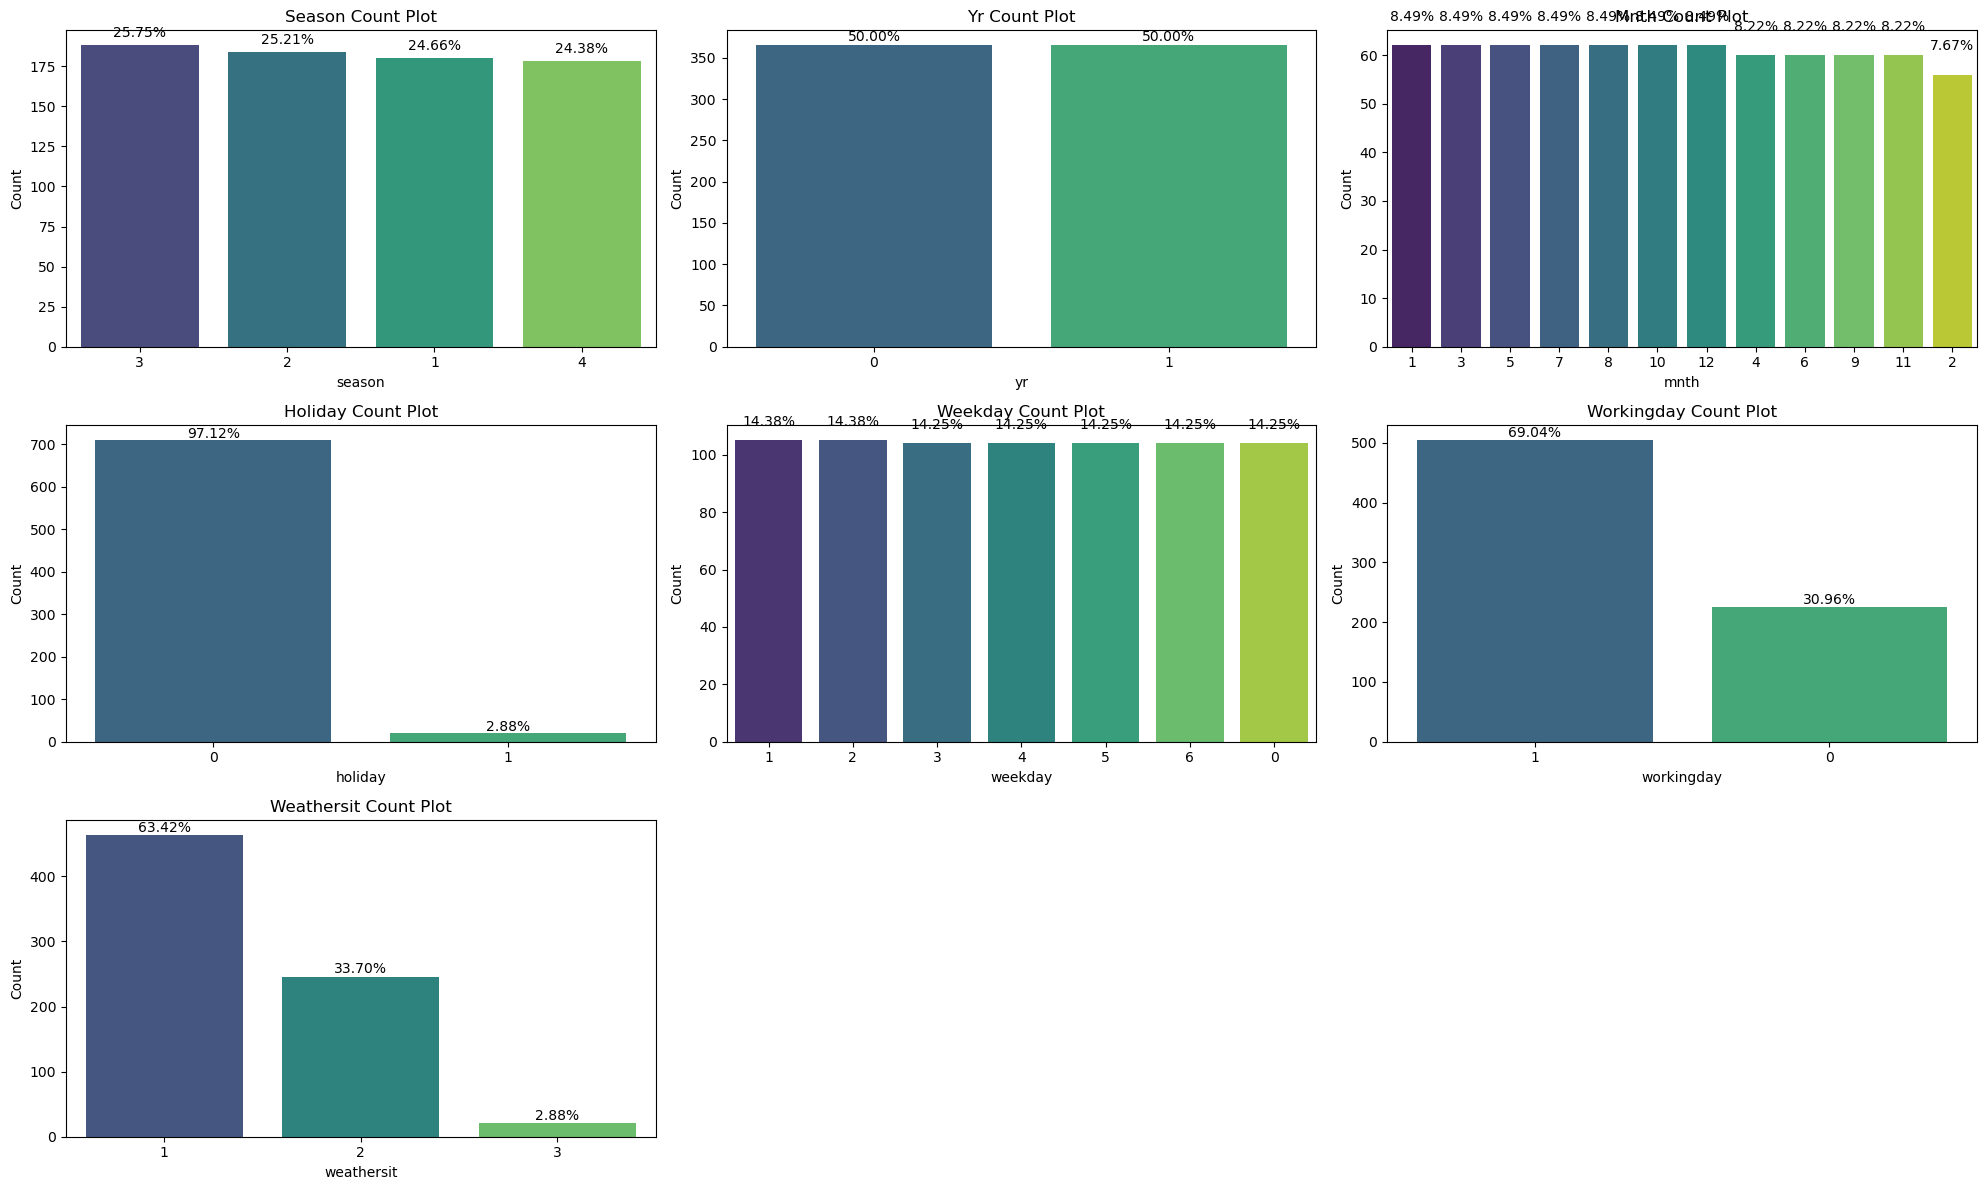

In [20]:
# checking all values of categorical variables in bar plot

cat_var = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

plt.figure(figsize=(20, 12))

for i, cat_var in enumerate(cat_var, start=1):
    plt.subplot(3, 3, i)
    sns.countplot(data=bs, x=cat_var, order=bs[cat_var].value_counts().index, palette='viridis')
    plt.title(f'{cat_var.capitalize()} Count Plot')
    plt.xlabel(cat_var)
    plt.ylabel('Count')

    # Normalize the y-axis to show proportions
    total = len(bs[cat_var])
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width() / 2, height + 5, f'{height / total:.2%}', ha='center')

        
plt.tight_layout()
plt.show()


### Insights:

- season: Most bike booking  happened - in season 2 summer and 3 fall with a median around 5000 booking.
    Suggestive of good predictor for the dependent variable.
    
    
- yr: 2019  far better year for the bike booking with  median above 5000 booking. Suggestive of good predictor

    
- mnth: Most bike booking were happening in the months 7,8,9 & 10 with a median of over 4000 booking per month. 
   so mnth has some trend for bookings and can be a good predictor for the dependent variable.


- holiday: Major  bike bookings happened in non- holiday. 
    so it  indicates, holiday can't be a good predictor. 
    
    
- weekday: No specific trend.all days have median value of around 5000.
   weekday cant be a good predictor.


- workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking.
    Suggestive of workingday can be a good predictor for the dependent variable
    
    
- weathersit:"show some trend"-  Most of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking
    followed by weathersit2 with median above 4000 .This indicates,weathersit can be a good predictor.



# Step 4: Data Preparation

### Involves encoding and creating dummy variables to handle categorical columns

#### total categorical variables:
cat_var = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

#### here "yr" ,"holiday" are already in binary type. hence no dummyfying required.

### Creating DUMMY variables for 4 categorical variables --> 'season','mnth', 'weathersit', 'weekday'

In [21]:
# recheck the datatype:
bs.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

### now we can proceed with creating dummy variable:

 1) Create Dummy variable
 
 2) Drop original variable for which the dummy was created
 
 3) Drop the first redundant dummy variable for each set of dummies created.


#### seasons column  - dummy variable -  change their names as per dataset characteristic description: 

In [22]:
# 1. Map 'season' values to names
bs['season'] = bs['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

# 2. Create dummy variables and drop first redundant dummy variable
bs_season = pd.get_dummies(bs['season'], drop_first=True)

#3. join dummy df to original dataframe: 
bs = pd.concat([bs, bs_season], axis = 1) 

# 3. Drop original 'season' column
bs = bs.drop('season', axis=1)

#### mnth column - dummy variable - change their names as per dataset characteristic description:

In [23]:
# 1. Map 'mnth' values to names
bs['mnth'] = bs['mnth'].map({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'})

# 2. Create dummy variables and drop first redundant dummy variable
bs_mnth= pd.get_dummies(bs['mnth'], drop_first=True)

#3. join dummy df to original dataframe: 
bs = pd.concat([bs, bs_mnth], axis = 1) 

# 3. Drop original 'mnth' column
bs = bs.drop('mnth', axis=1)

#### weathersit column - dummy variable - change their names as per dataset characteristic description:

In [24]:
bs['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [25]:
# 1. Map 'weathersit' values to names
bs['weathersit'] = bs['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'})

# 2. Create dummy variables and drop first redundant dummy variable
bs_weathersit = pd.get_dummies(bs['weathersit'], drop_first=True)

#3. join dummy df to original dataframe: 
bs = pd.concat([bs, bs_weathersit], axis = 1) 

# 3. Drop original 'weathersit' column
bs = bs.drop('weathersit', axis=1)

#### weekday column - dummy variable - change their names as per dataset characteristic description:

In [26]:
bs['weekday'].unique()

array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

In [27]:
# 1. Map 'weekday' values to names
bs['weekday'] = bs['weekday'].map({0: 'sun',1: 'mon', 2: 'tues', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'})

# 2. Create dummy variables and drop first redundant dummy variable
bs_weekday = pd.get_dummies(bs['weekday'], drop_first=True)

#3. join dummy df to original dataframe: 
bs = pd.concat([bs, bs_weekday], axis = 1) 

# 3. Drop original 'weekday' column
bs = bs.drop('weekday', axis=1)

In [28]:
#  Now let's check our dataframe.
print(bs.head())

   yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   spring  summer  ...  oct  sep  Light Snow  Mist  mon  sat  sun  thu  tues  \
0       1       0  ...    0    0           0     1    1    0    0    0     0   
1       1       0  ...    0    0           0     1    0    0    0    0     1   
2       1       0  ...    0    0           0     0    0    0    0    0     0   
3       1       0  ...    0    0           0     0    0    0    0    1     0   
4       1       0  ...    0    0           0     0    0    0    0    0     0   

   wed  
0    0  
1    0  
2    1  
3    0  
4    0  

[

In [29]:
bs.shape

(730, 30)

# Step 5: Splitting The Data into Train and Test set

In [30]:
# import the reqd libraries:
import sklearn
from sklearn.model_selection import train_test_split

In [31]:
# We directly give dataset name and create train and test sets out of it.
# we are specifying 'random_state' so that we will get the same split of data and results are reproducible:
# Train size 70% and test :30%

np.random.seed(0)
bs_train, bs_test = train_test_split(bs, train_size = 0.7, test_size = 0.3, random_state = 100)

In [32]:
print(bs_train.shape)  #70%
print(bs_test.shape)   #30%

(510, 30)
(219, 30)


In [33]:
bs_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,Light Snow,Mist,mon,sat,sun,thu,tues,wed
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,0,0,0,1
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,1,0,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,1,0,0,0


In [34]:
bs_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,Light Snow,Mist,mon,sat,sun,thu,tues,wed
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,1,0,0,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,1,0,1,0,0,0,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,0,0,1,0,0,0,0


# Step 6: Rescaling the Features

#### apply min-max scaler to numeric columns alone. 

In [35]:
# importing MinMaxScaler for rescalling 

from sklearn.preprocessing import MinMaxScaler

### steps to rescale the features:
1. Instantiate an object
2. Create a list of numeric variables
3. Fit on train data and transform.
4. Check using bs_train.head() and describe() to check the ranges of min and max values.

In [36]:
# 1. Instantiate an object
scaler = MinMaxScaler()

In [37]:
# 2.Apply min-max scaler to numeric columns alone:
num_var = ['temp', 'atemp', 'hum', 'windspeed','cnt']

In [38]:
#3. Fit on train data and transform.
bs_train[num_var]=scaler.fit_transform(bs_train[num_var])

In [39]:
# 4.Check using bs_train.head()
bs_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,Light Snow,Mist,mon,sat,sun,thu,tues,wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,1,0,0,0


In [40]:
# 4. Check using describe() to check the ranges of min and max values.
bs_train.describe(include='all')

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,Light Snow,Mist,mon,sat,sun,thu,tues,wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.029412,0.343137,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.169124,0.475223,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 7: Check the correlation coefficients using Heatmap 

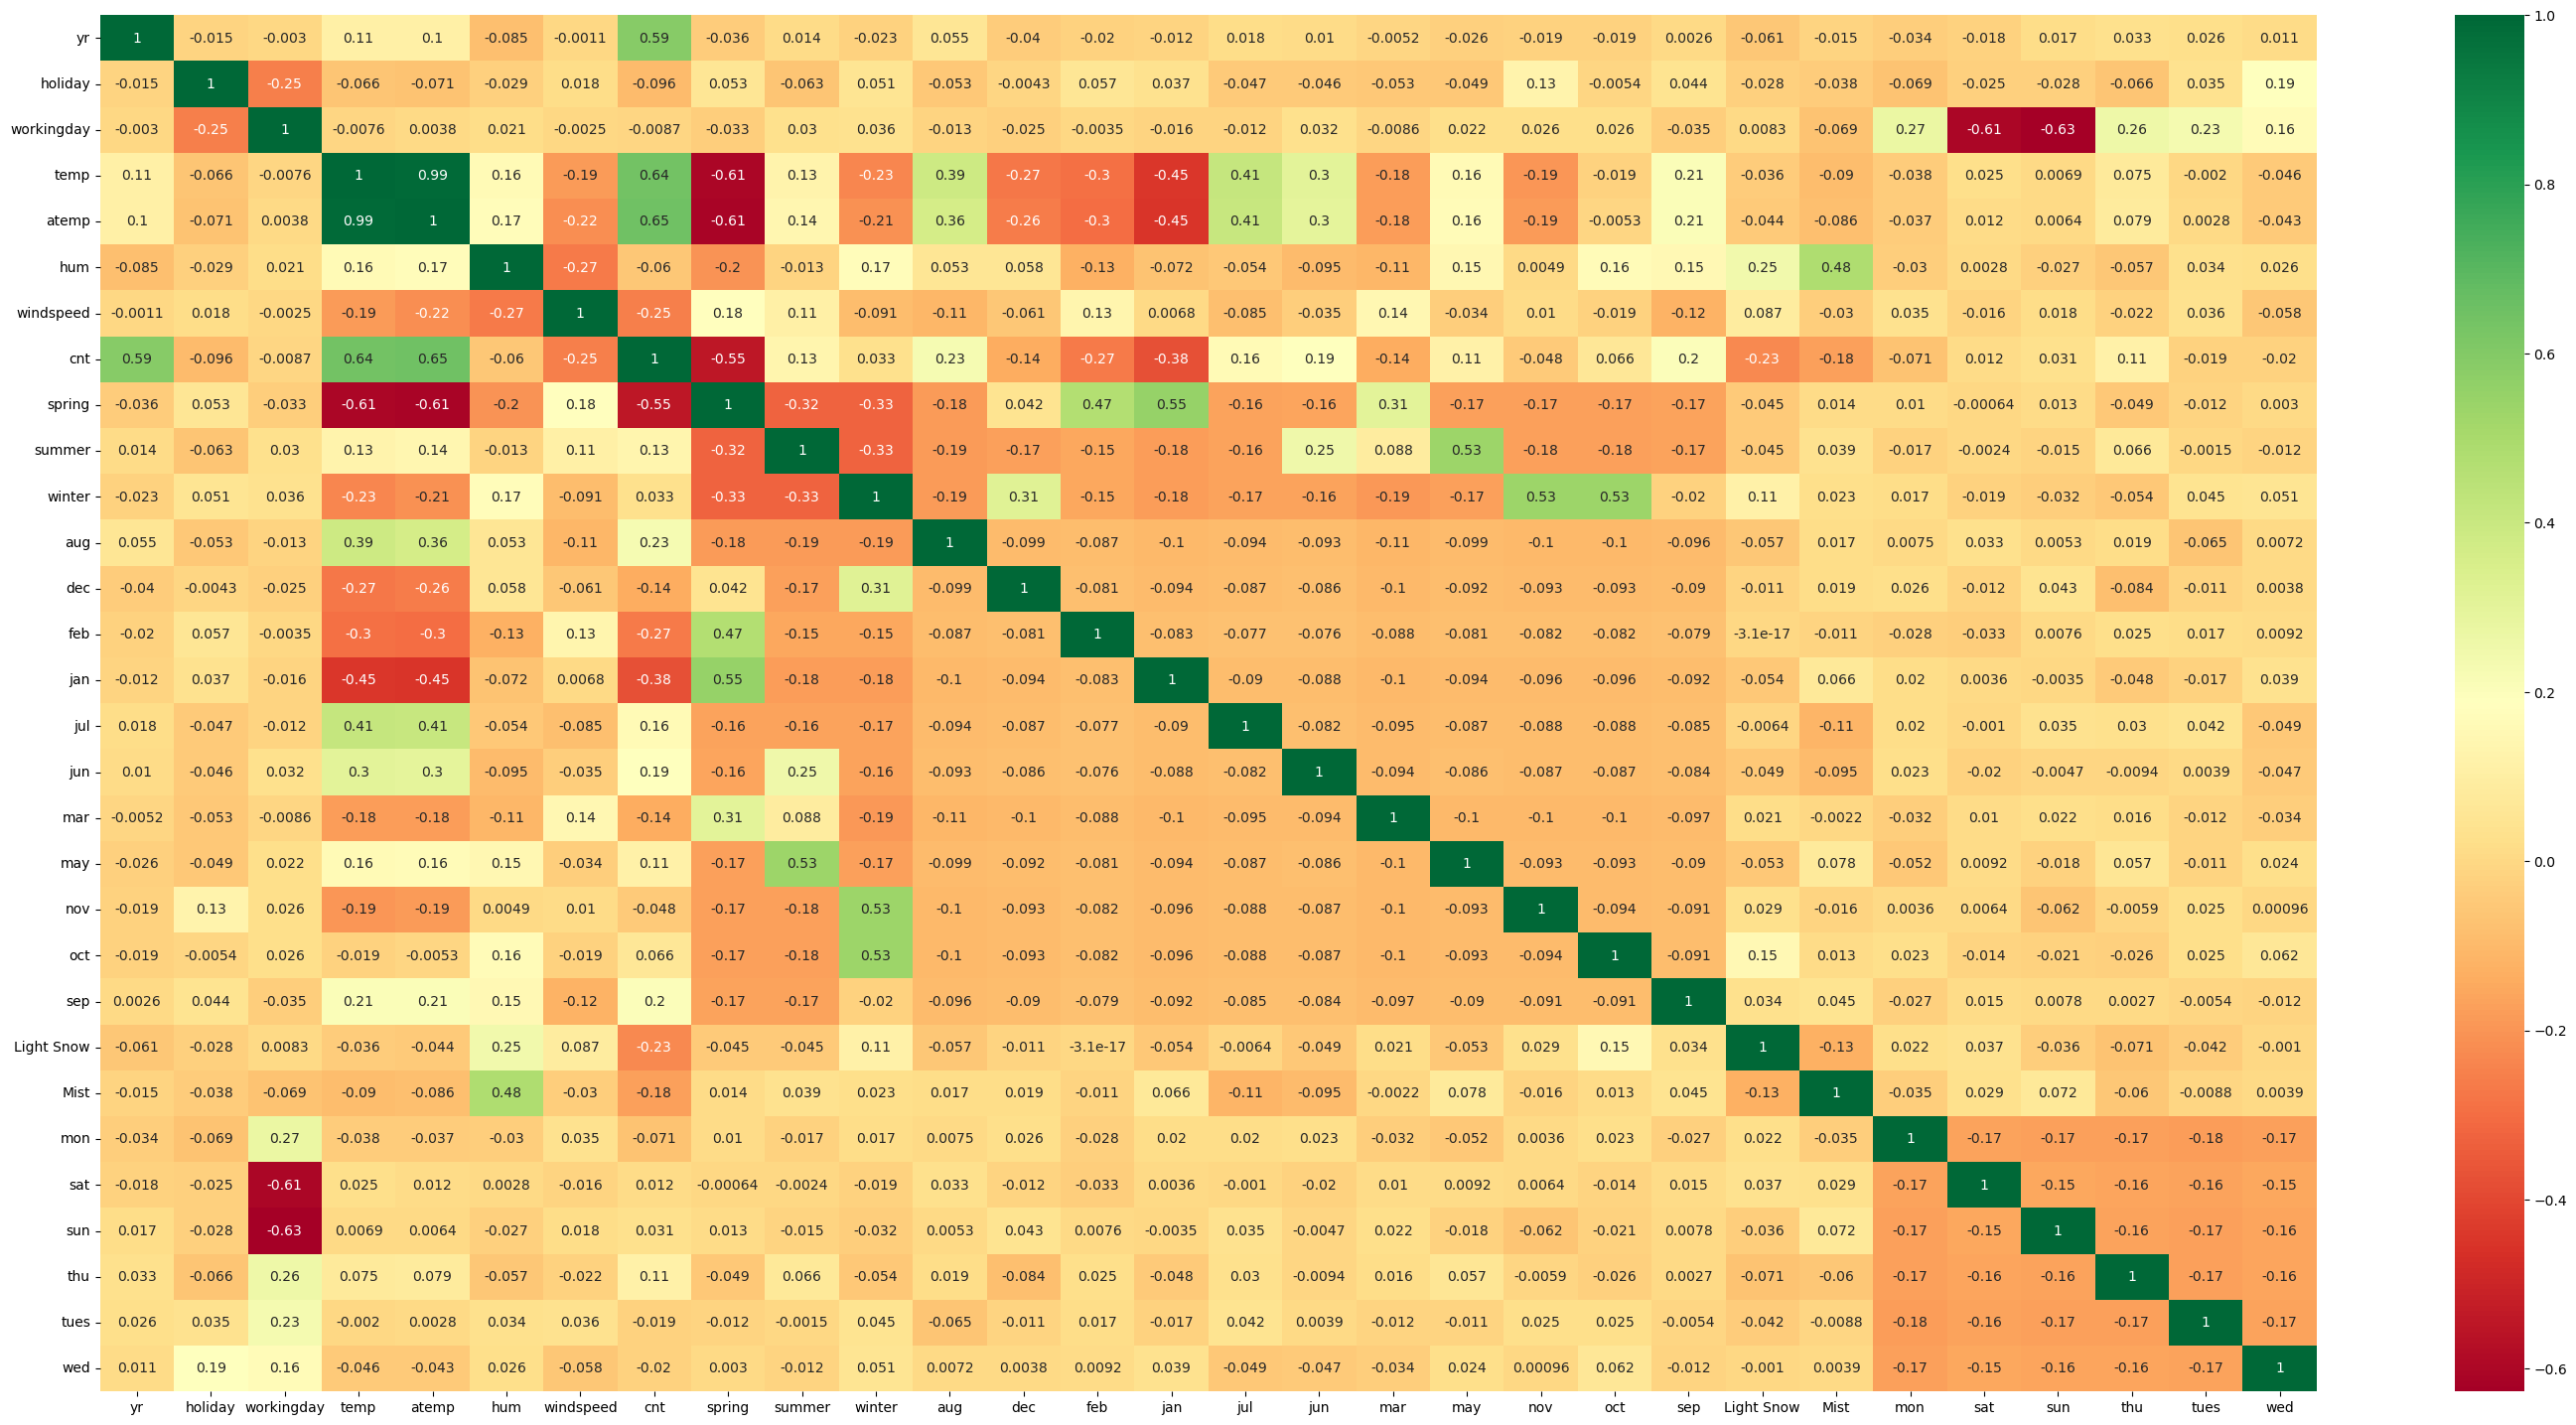

In [41]:
plt.figure(figsize = [36,18])
sns.heatmap(bs_train.corr(),annot =True, cmap= "RdYlGn")
plt.show()

### Insights:
- Multicollinearity with the target variable : between temp and atemp.
    
- we will check these correlated values along with VIF & p-value,
  for identifying the correct variable to select/eliminate from the model.
    
- some correlations seen between few seasons,months,temp and yr.

# Step 8: BUILDING A LINEAR MODEL

### Dividing into X and y sets for the model building

#### we will have
                X---> allcolumns except "cnt"
                y---> "cnt" column alone
                remove "cnt" using pop method and add it to y _train

In [42]:
# Create X and y variables:
y_train = bs_train.pop("cnt")
X_train = bs_train

In [43]:
# recheck columns count:
X_train.shape

(510, 29)

In [44]:
y_train.shape

(510,)

## We will use RFE and statsmodel method combined for obtaining optimum final model

### RFE method:


Recursive feature elimination

### steps:
- 1. Importing RFE and LinearRegression
- 2. Create an object of LinearRegression.
- 3. Fit on train data.
- 4. Get the selected features support and its Self ranking.(one feature name, its support status, and its ranking.)
- 5. Pick out the column names of the features selected by RFE  to new variable.
- 6. Pick out the column names of the features that were not selected by RFE  to new variable.


In [46]:
# 1. Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [47]:
# 2. Create an object of LinearRegression.
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()

In [48]:
# 3. Fit on train data.
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)            # running RFE
rfe = rfe.fit(X_train, y_train)

In [52]:
# 4. Get the selected features support and its Self ranking.(one feature name, its support status, and its ranking.)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 14),
 ('mar', False, 15),
 ('may', False, 7),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('mon', False, 9),
 ('sat', False, 4),
 ('sun', False, 5),
 ('thu', False, 13),
 ('tues', False, 8),
 ('wed', False, 11)]

In [49]:
# 5. Pick out the column names of the features selected by RFE  to new variable.
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'jul', 'nov', 'sep', 'Light Snow', 'Mist'],
      dtype='object')

In [50]:
#  6. Pick out the column names of the features that were not selected by RFE  to new variable.
no_col = X_train.columns[~rfe.support_]
no_col

Index(['workingday', 'atemp', 'aug', 'feb', 'jun', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tues', 'wed'],
      dtype='object')

In [51]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [52]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'jul', 'nov', 'sep', 'Light Snow', 'Mist'],
      dtype='object')

## Building model using statsmodel to get  detailed statistics


#### Check for the VIF values,pvalues, Rsquared and adjusted Rsquared values  of the feature variables. 

#### Drop if 
- high pvalue (or)
- high p value and low vif.
- later check if high vif


### Model 1

In [53]:
import statsmodels.api as sm 


In [54]:
#BUILDING MODEL USING STATSMODEL:
# Adding a constant variable 

X_train_lm1 = sm.add_constant(X_train_rfe)

In [55]:
# Running the linear model
lr1=sm.OLS(y_train,X_train_lm1).fit()

In [56]:
# Check the parameters obtained
params = lr1.params
print(params)

const         0.320243
yr            0.230328
holiday      -0.091228
temp          0.479977
hum          -0.160227
windspeed    -0.188457
spring       -0.061737
summer        0.040767
winter        0.103435
dec          -0.037199
jan          -0.043748
jul          -0.055495
nov          -0.040949
sep           0.074891
Light Snow   -0.248116
Mist         -0.055876
dtype: float64


In [57]:
#Let's view the summary of our linear model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sat, 26 Aug 2023   Prob (F-statistic):          3.34e-189
Time:                        20:16:02   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3202      0.036      8.886      0.0

#### VIF Check

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
14,Mist,2.32
0,yr,2.09
11,nov,1.83
9,jan,1.75


####  insights of model 1:
- drop high p value : dec --->  0.034 
- high VIF : hum ---> 30.94


### Model 2:

#### Decided to drop high p value : dec --->  0.034 
- wanted to retain 'hum' as of now.

In [98]:
# drop "dec"
X_train_rfe2 = X_train_rfe.drop(["dec"], axis = 1)

In [99]:
#BUILDING MODEL USING STATSMODEL:
# Adding a constant variable 
X_train_lm2 = sm.add_constant(X_train_rfe2)

# Running the linear model
lr2=sm.OLS(y_train,X_train_lm2).fit()

#Let's see the summary of our linear model
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          2.25e-189
Time:                        09:00:35   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3030      0.035      8.597      0.0

#### VIF Check

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features']=X_train_rfe2.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.12
2,temp,16.80
4,windspeed,4.71
5,spring,4.37
7,winter,3.78
6,summer,2.79
13,Mist,2.29
0,yr,2.09
8,jan,1.67
9,jul,1.59


#### insights of model 2:
- high p value : nov  ----->  0.144
- high vif     : hum  -----> 29.12

### Model 3:

#### Decided to  drop high p value :  nov  ----->  0.144


In [101]:
# drop  'nov' :
X_train_rfe3 = X_train_rfe2.drop([ 'nov' ], axis = 1)

In [102]:
#BUILDING MODEL USING STATSMODEL:
# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_rfe3)

# Running the linear model
lr3 = sm.OLS(y_train,X_train_lm3).fit()

#Let's see the summary of our linear model
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          4.45e-190
Time:                        09:01:22   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2957      0.035      8.466      0.0

#### VIF Check

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features']=X_train_rfe3.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,hum,29.05
2,temp,16.70
4,windspeed,4.66
5,spring,4.34
7,winter,3.38
6,summer,2.78
12,Mist,2.28
0,yr,2.09
8,jan,1.67
9,jul,1.59


#### insights of model 3:
- high p-value: jan ----> 0.061
- high vif    : hum ----> 29.05

### Model 4:

#### Decided to drop  high p value : jan  -----> 0.061


In [105]:
# drop  'jan':
X_train_rfe4 = X_train_rfe3.drop(['jan'], axis = 1)

In [106]:
#BUILDING MODEL USING STATSMODEL:
# Adding a constant variable 
X_train_lm4 = sm.add_constant(X_train_rfe4)

# Running the linear model
lr4 = sm.OLS(y_train,X_train_lm4).fit()

#Let's see the summary of our linear model
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          1.69e-190
Time:                        09:02:39   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2841      0.034      8.242      0.0

#### VIF Check

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features']=X_train_rfe4.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,hum,28.06
2,temp,16.02
4,windspeed,4.65
5,spring,4.01
7,winter,3.35
6,summer,2.78
11,Mist,2.28
0,yr,2.08
8,jul,1.58
9,sep,1.38


#### insights of model 4:
- high p-value: spring ----> 0.007
- high vif    : hum -----> 28.06

### Model 5:

#### Decided to drop 'high' vif   : hum -----> 28.06


In [108]:
# drop  'hum' :
X_train_rfe5 = X_train_rfe4.drop(['hum'], axis = 1)

In [109]:
#BUILDING MODEL USING STATSMODEL:
# Adding a constant variable 
X_train_lm5 = sm.add_constant(X_train_rfe5)

# Running the linear model
lr5 = sm.OLS(y_train,X_train_lm5).fit()

#Let's see the summary of our linear model
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          2.40e-187
Time:                        09:04:01   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1996      0.030      6.758      0.0

#### VIF Check

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features']=X_train_rfe5.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.21
4,spring,2.08
0,yr,2.07
6,winter,1.79
7,jul,1.58
10,Mist,1.55
8,sep,1.34
9,Light Snow,1.08


#### insights of model 5:
- high p-value:  'jul'-----> 0.005
- high vif    :   temp----> 5.09

### Model 6:

#### Decided to drop high p value : jul ---->  0.005


In [120]:
# drop  'jul' :
X_train_rfe6 = X_train_rfe5.drop(['jul'], axis = 1)

In [121]:
#BUILDING MODEL USING STATSMODEL:
# Adding a constant variable 
X_train_lm6 = sm.add_constant(X_train_rfe6)

# Running the linear model
lr6 = sm.OLS(y_train,X_train_lm6).fit()

#Let's see the summary of our linear model
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          7.36e-187
Time:                        09:37:28   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1910      0.030      6.456      0.0

#### VIF Check

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features']=X_train_rfe6.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,yr,2.07
4,spring,1.99
5,summer,1.89
6,winter,1.63
9,Mist,1.54
7,sep,1.23
8,Light Snow,1.08
1,holiday,1.04


In [123]:
X_train_rfe6.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'sep', 'Light Snow', 'Mist'],
      dtype='object')

#### Insights:

- The  Model 6 looks satisfied with no more p value >= 0.05 and vif >= 5.


- Very low multicollinearity between the predictor variables.


        
- #### R-squared:  0.833   and  Adj. R-squared: 0.830 values are good.

        
- #### F-static is also large (249.2), stating a good fit of model (statistically significant).


- #### So we go ahead and make our predictions using this as Final model.


- We will check the test data metrics to check whether this model is significant enough or not.

F-statistic:  249.2
    
Prob (F-statistic):  7.36e-187
    
The F-Statistics value of 249.2 and the p-value of <= 0.05 indicates that the overall model is significant

# Step 9 : RESIDUAL ANALYSIS OF THE TRAIN DATA

### 1. Let us plot the histogram of the error terms and see if they are also normally distributed with mean equal to zero

In [124]:
# use lr6 to predict y_train based on x_train_rfe6 trained 
y_train_pred = lr6.predict(X_train_lm6)


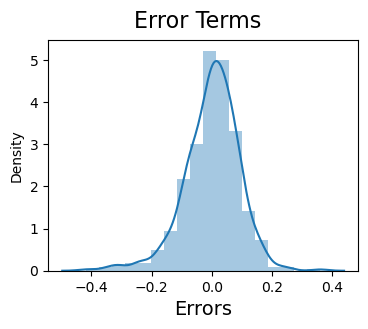

In [125]:
# Plot the histogram of the error terms
fig = plt.figure(figsize = [4,3])
sns.distplot((y_train - y_train_pred), bins = 18)
fig.suptitle('Error Terms', fontsize = 16)                  # Plot heading 
plt.xlabel('Errors', fontsize = 14)                         # X-label
plt.show()

### Insights
The above histogram shows that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

### 2. Plot The Actual Demands Against The Predicted Demands

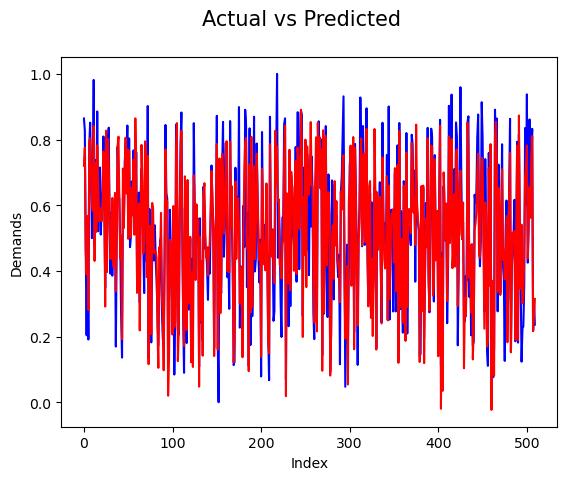

In [126]:
# Actual vs Predicted
p = [i for i in range(0,len(X_train),1)]
plt.plot(p,y_train, color="blue")
plt.plot(p,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)       # Plot heading
plt.xlabel('Index')                                      # X-label  
plt.ylabel('Demands')                                    # Y-label
plt.show()


#### Good Overlap Of Actual And Predicted Values

#### Actual and Predicted values are following similar pattern so this model is good one to use.

### 3.Plot The Error Terms Between The Actual Demands And The Predicted Demands

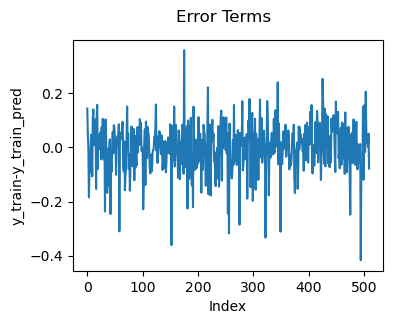

In [127]:
# Error Terms
plt.figure(figsize =[4,3])
et = [i for i in range(0,len(X_train),1)]
plt.plot(et,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 12)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

#### 4. Check if The Error Terms Are Independent Of Each Other.

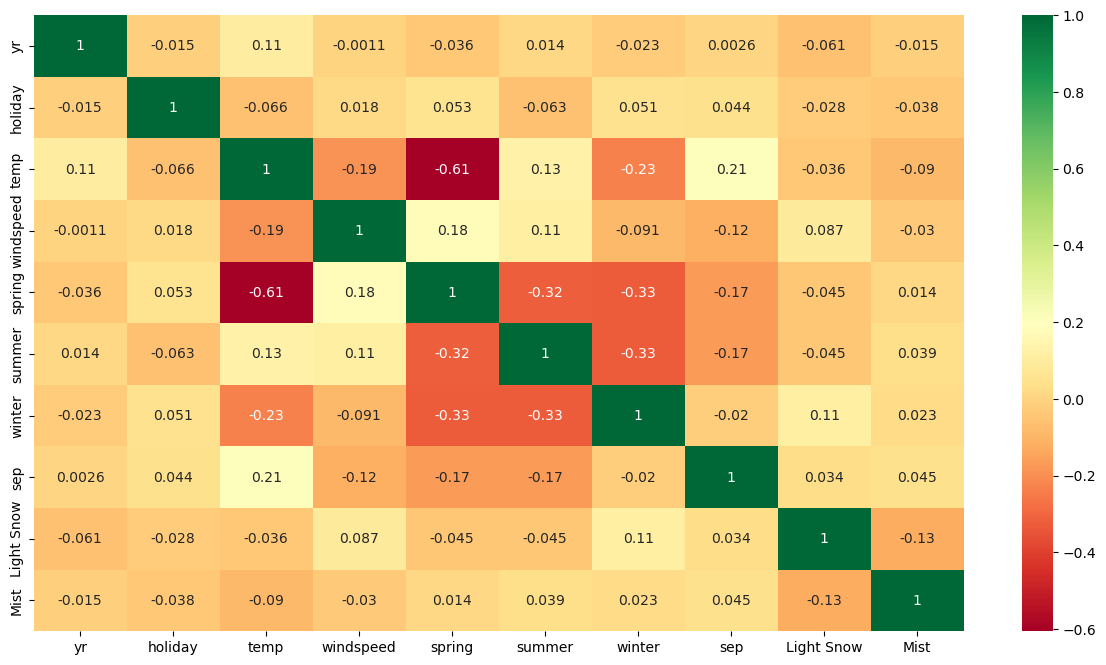

In [129]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe6.corr(),annot = True, cmap="RdYlGn")
plt.show()

#### Durbin-Watson: 2.076 value indicates that the residuals have little to no autocorrelation that the independence of error terms assumption is right.

#### All VIF <5 and There is no multicolinearity as seen from the heatmap.

# Step 10: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, let's  make predictions using the final model (6th model.)

### Apply the scaling to all numeric variables on test dataset.

In [110]:
#### we apply only transform on  test dataset.
# use the metrics that the model learned from the training data to be applied on the test data.

In [130]:
# Create  a list of numeric variales.transform on test dataset
num_var = ['temp', 'atemp', 'hum', 'windspeed','cnt']
num_var

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [131]:
bs_test[num_var] = scaler.transform(bs_test[num_var])

In [132]:
bs_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,Light Snow,Mist,mon,sat,sun,thu,tues,wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.027397,0.319635,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.163612,0.467403,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 10:  Performing Predictions On The Test Dataset:-

### steps:

    1. Create  and assign X and y.
    2. Remove the variables done from train dataset already on the test dataset correspondingly.
    3. Add constant variable to test dataframe
    4. Predict The Test Set Using The X_Test Of Final Model (Lr6) 
    5. Evaluate the  model using r2 score


### 1. create  and assign X and y.

In [133]:
#### Dividing into X_test and y_test

y_test = bs_test.pop('cnt')
# 'cnt' col popped out and added to ytest

# rest of the col assigned to X test
X_test = bs_test

In [134]:
# recheck shape:
X_test.shape

(219, 29)

In [135]:
y_test.shape

(219,)

### 2. Remove the variables done from train dataset already on the test daaset correspondingly.

In [136]:
# retain the same variables for test dataset too:
col_1 = X_train_rfe6.columns
col_1 

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'sep', 'Light Snow', 'Mist'],
      dtype='object')

In [137]:
X_test = X_test[col_1]

### 3. Add Constant Variable To Test Dataframe

In [139]:
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       219 non-null    float64
 1   yr          219 non-null    int64  
 2   holiday     219 non-null    int64  
 3   temp        219 non-null    float64
 4   windspeed   219 non-null    float64
 5   spring      219 non-null    uint8  
 6   summer      219 non-null    uint8  
 7   winter      219 non-null    uint8  
 8   sep         219 non-null    uint8  
 9   Light Snow  219 non-null    uint8  
 10  Mist        219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [145]:
X_test_lm6.head()

,const,yr,holiday,temp,windspeed,spring,summer,winter,sep,Light Snow,Mist
184,1.0,0,1,0.831783,0.084219,0,0,0,0,0,1
535,1.0,1,0,0.901354,0.153728,0,1,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,0,1,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,1,0,0,0,0


### 4. Predict The Test Set Using The X_Test Of  Final Model (Lr6) :

In [140]:
y_pred = lr6.predict(X_test_lm6)
#y_train_pred = lr9.predict(X_train_lm9)

### 5. Evaluate The Model Using R2 Score  and Adjusted R2

In [141]:
from sklearn.metrics import r2_score

#### R2 Value for TEST

In [142]:
r2 = r2_score(y_true = y_test ,y_pred = y_pred)
r2

0.8035441330582012

- R-squared of train datset :  0.833
- R-squared of test  datset :  0.803

#### r2 of 0.803 is a good score and similar to train set where the final model showed r2 0.833

#### Adjusted R2 Value for TEST

In [143]:
# n is number of rows in X
n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7940991394552301

- Adj. R-squared of train datset :  0.830
- Adj. R-squared of test  datset :  0.794


#### Adjusted r2 of 0.794 is a good score and predictions similar to train set where the final model showed Adjusted r2 0.830

# Step 11 : Model Evaluation

Let's now plot the graph for actual versus predicted values.

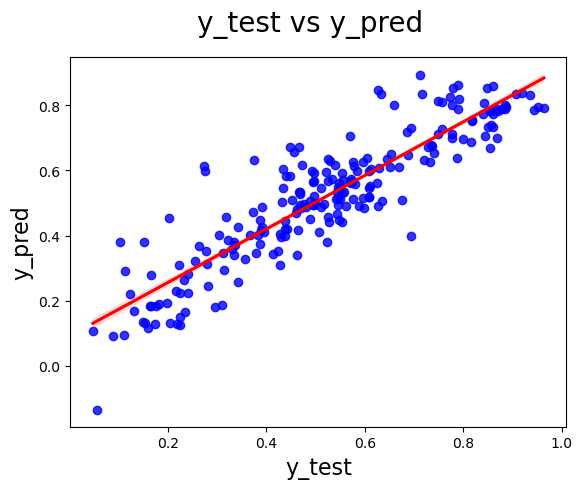

In [144]:
# Plotting y_test and y_pred to understand the spread
# Visualizing the fit on the test data

fig = plt.figure()
sns.regplot(y_test, y_pred,ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 16)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  
plt.show()

# Step 12 : Equation Of Best Fit Line Based On Final Model

### The equation of our best fitted line is:

cnt =  0.1214  + (yr ×  0.2341) -(holiday x -0.0969) -(spring  x 0.0551 ) + (temp × 0.4782 ) − (windspeed × 0.1482 ) + (summer ×   0.0610 ) + (winter  × 0.0959 ) + (sep ×  0.0909  ) - (Light Snow ×  0.2860) − (Mist × 0.0801 ) 


### Predictor Variables from My Final Model - 10 features:

 1   yr         : year 
 
 2   holiday    : holiday

 3   spring     : 1st season
        
 4   temp       : temperature
    
 5   windspeed  : windspeed 
    
 6   summer     : 2nd season
        
 7   winter     : 4th season 
        
 8   sep        : September
    
 9   Light Snow : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    
 10   Mist       : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist


### Top 3 most important predictor variables: 

- Temperature (temp) - A coefficient value of '0.4782' indicated that a unit increase in temp variable

increases the bike hire numbers by '0.4782' units.



- Year (yr) - A coefficient value of '0.2341' indicated that a unit increase in yr variable 

increases the bike hire numbers by '0.2341'  units.



- Light Snow (weathersit_3) - A coefficient value of "-0.2860" indicated that, a unit increase in Light Snow variable

decreases the bike hire numbers by '0.2860'units.

### Other important predictor variables to watchout for:

    
- windspeed: - A coefficient value of '-0.1482' indicated that, a unit increase in windspeed variable 
    
    decreases the bike hire numbers by '0.1482' units.

    
- holiday: - A coefficient value of '-0.0969' indicated that, a unit increase in holiday variable 
    
    decreases the bike hire numbers by '0.0969' units.

    
- winter: (4th season) - A coefficient value of '0.0959' indicated a unit increase in winter variable 
    
    increases the bike hire numbers by '0.0959'  units.
    
    
- sep (september month): - A coefficient value of '0.0909' indicated that, a unit increase in september variable 
    
    increases the bike hire numbers by '0.0909' units.
    
    
- Mist(weathersit_3): - A coefficient value of '-0.0801' indicated that, a unit increase in mist variable 
    
    decreases the bike hire numbers by '-0.0801' units.
    
    
- summer(2nd season): - A coefficient value of '0.0610' indicated that, a unit increase in summer variable 
    
    increases the bike hire numbers by '0.0610' units.
    
    
- spring( 1st season ): - A coefficient value of '-0.0551' indicated that, a unit increase in spring variable 
    
    decreases the bike hire numbers by '-0.0551' units.
    
    

### Analysing the above model, the comapany should focus on the following features:


** Increase marketing during**:  

- Company can focus on marketing more during summer and winter season especially in "july,august,september" month
  as their sales would more likely to increase as per the analysis.

- Compared to previous the 2018 , the next year 2019 had improved revenue through more bookings.
    So afterwhen the quarantine situation ends,
   the demand  is more likely to increase gradually in the upcoming years.

** During Low Times**:  
    
- Attractive offers can be introduced on "holidays"  Since the bookings are less comparatively at that time.
    
- There would be less bookings and demand during Light Snow or Rain/heavy rain weather times, so the company can expect very less revenue 
  and probably use this time to service the bikes.
    
- High windspeed is also associated with less bookings because of driving difficulties.The company can provide offfers at low expected times
 and provide necessary accessories like waterproof raincoats/jackets to boost up the bookings.
    
- This can also increase customer value.
    



